In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix

In [4]:
# LOADIND DATA SET

df = pd.read_csv("dataset.csv") 

df.dropna(inplace=True)
X = df["text"]
y = df["label"]

In [5]:
# COVERTING TO TF-IDF

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=24)

In [6]:
# CLASSIFIERS

models = {
    "DECISION TREE": DecisionTreeClassifier(),
    "RANDOM FOREST": RandomForestClassifier(),
    "SVM": SVC(),
    "NAIVE BAYES": MultinomialNB(),
    "LOGISTIC REGRESSION": LogisticRegression()
}
# STROING RESULTS

accuracy_results={}
time_results={}
classification_reports={}

DECISION TREE Accuracy: 0.9270
DECISION TREE Prediction Time: 1.5033 seconds
+--------------+-------------+----------+------------+-----------+
| Class        | Precision   | Recall   |   F1-score | Support   |
+==============+=============+==========+============+===========+
| 0            | 0.9101      | 0.9468   |     0.9281 | 770       |
+--------------+-------------+----------+------------+-----------+
| 1            | 0.9450      | 0.9073   |     0.9258 | 777       |
+--------------+-------------+----------+------------+-----------+
| macro avg    | 0.9276      | 0.9270   |     0.9269 | 1547      |
+--------------+-------------+----------+------------+-----------+
| weighted avg | 0.9277      | 0.9270   |     0.9269 | 1547      |
+--------------+-------------+----------+------------+-----------+
| Accuracy     | -           | -        |     0.927  | -         |
+--------------+-------------+----------+------------+-----------+


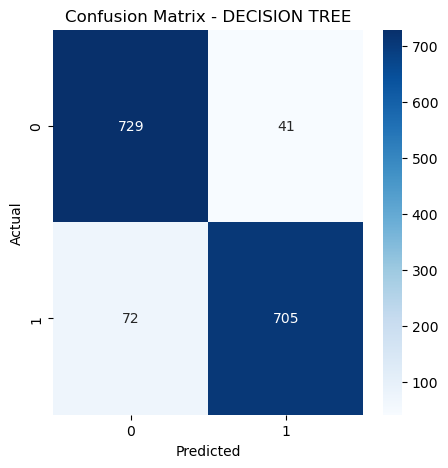

RANDOM FOREST Accuracy: 0.9567
RANDOM FOREST Prediction Time: 11.9208 seconds
+--------------+-------------+----------+------------+-----------+
| Class        | Precision   | Recall   |   F1-score | Support   |
+==============+=============+==========+============+===========+
| 0            | 0.9240      | 0.9948   |     0.9581 | 770       |
+--------------+-------------+----------+------------+-----------+
| 1            | 0.9944      | 0.9189   |     0.9552 | 777       |
+--------------+-------------+----------+------------+-----------+
| macro avg    | 0.9592      | 0.9569   |     0.9566 | 1547      |
+--------------+-------------+----------+------------+-----------+
| weighted avg | 0.9594      | 0.9567   |     0.9566 | 1547      |
+--------------+-------------+----------+------------+-----------+
| Accuracy     | -           | -        |     0.9567 | -         |
+--------------+-------------+----------+------------+-----------+


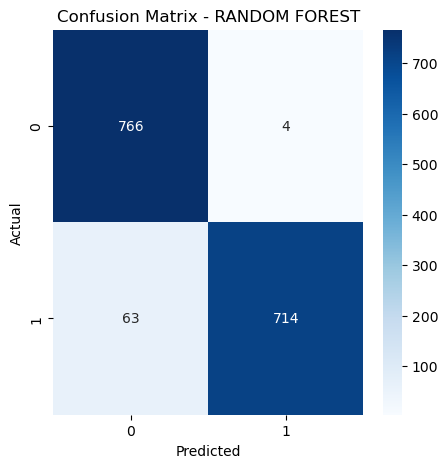

SVM Accuracy: 0.9580
SVM Prediction Time: 5.3166 seconds
+--------------+-------------+----------+------------+-----------+
| Class        | Precision   | Recall   |   F1-score | Support   |
+==============+=============+==========+============+===========+
| 0            | 0.9336      | 0.9857   |     0.9589 | 770       |
+--------------+-------------+----------+------------+-----------+
| 1            | 0.9850      | 0.9305   |     0.957  | 777       |
+--------------+-------------+----------+------------+-----------+
| macro avg    | 0.9593      | 0.9581   |     0.958  | 1547      |
+--------------+-------------+----------+------------+-----------+
| weighted avg | 0.9594      | 0.9580   |     0.958  | 1547      |
+--------------+-------------+----------+------------+-----------+
| Accuracy     | -           | -        |     0.958  | -         |
+--------------+-------------+----------+------------+-----------+


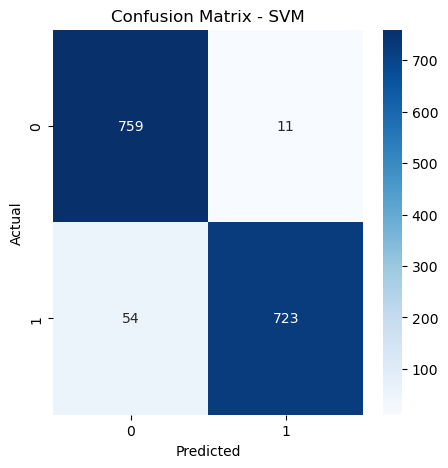

NAIVE BAYES Accuracy: 0.7990
NAIVE BAYES Prediction Time: 0.0092 seconds
+--------------+-------------+----------+------------+-----------+
| Class        | Precision   | Recall   |   F1-score | Support   |
+==============+=============+==========+============+===========+
| 0            | 0.9732      | 0.6130   |     0.7522 | 770       |
+--------------+-------------+----------+------------+-----------+
| 1            | 0.7194      | 0.9833   |     0.8309 | 777       |
+--------------+-------------+----------+------------+-----------+
| macro avg    | 0.8463      | 0.7981   |     0.7915 | 1547      |
+--------------+-------------+----------+------------+-----------+
| weighted avg | 0.8457      | 0.7990   |     0.7917 | 1547      |
+--------------+-------------+----------+------------+-----------+
| Accuracy     | -           | -        |     0.799  | -         |
+--------------+-------------+----------+------------+-----------+


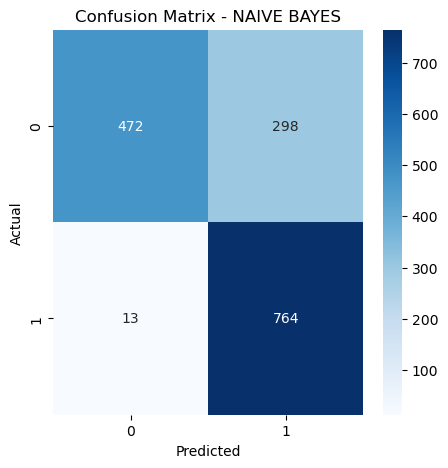

LOGISTIC REGRESSION Accuracy: 0.9515
LOGISTIC REGRESSION Prediction Time: 0.2727 seconds
+--------------+-------------+----------+------------+-----------+
| Class        | Precision   | Recall   |   F1-score | Support   |
+==============+=============+==========+============+===========+
| 0            | 0.9222      | 0.9857   |     0.9529 | 770       |
+--------------+-------------+----------+------------+-----------+
| 1            | 0.9848      | 0.9176   |     0.95   | 777       |
+--------------+-------------+----------+------------+-----------+
| macro avg    | 0.9535      | 0.9517   |     0.9515 | 1547      |
+--------------+-------------+----------+------------+-----------+
| weighted avg | 0.9537      | 0.9515   |     0.9515 | 1547      |
+--------------+-------------+----------+------------+-----------+
| Accuracy     | -           | -        |     0.9515 | -         |
+--------------+-------------+----------+------------+-----------+


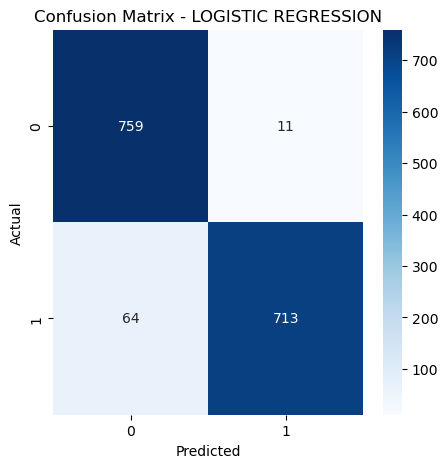

In [7]:
# TRAINING AND EVALUATE

from tabulate import tabulate

# TRAINING AND EVALUATION
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()
    
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc
    time_results[name] = end_time - start_time
    
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"{name} Prediction Time: {time_results[name]:.4f} seconds")

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report.get("accuracy", None)

    # Convert report dictionary into table format
    table_data = []
    for label, metrics in report.items():
        if isinstance(metrics, dict):  # Ignore overall accuracy (not a dictionary)
            table_data.append([
                label, 
                f"{metrics['precision']:.4f}", 
                f"{metrics['recall']:.4f}", 
                f"{metrics['f1-score']:.4f}", 
                f"{metrics['support']:.0f}"
            ])
    
    # Add accuracy as a separate row
    table_data.append(["Accuracy", "-", "-", f"{acc:.4f}", "-"])

    # Define column headers
    headers = ["Class", "Precision", "Recall", "F1-score", "Support"]

    # Print table using tabulate
    print(tabulate(table_data, headers=headers, tablefmt="grid"))

    # CONFUSION MATRIX
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    print("==============================================================")


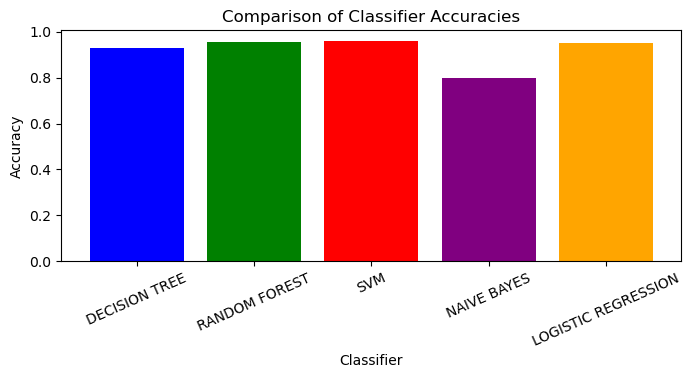

In [8]:
# COMPARING MODEL ACCURACY

plt.figure(figsize=(8,3))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Comparison of Classifier Accuracies")
plt.xticks(rotation=24)
plt.show()

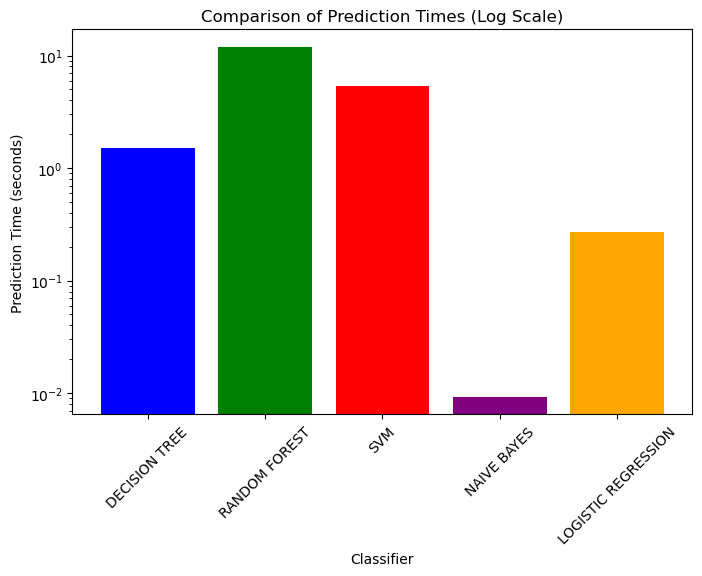


Final Results Table:

+---------------------+------------+----------+------------+-----------------------------+
| Classifier          |   Accuracy |   Recall |   F1-Score |   Prediction Time (seconds) |
+=====================+============+==========+============+=============================+
| DECISION TREE       |     0.927  |   0.927  |     0.9269 |                    1.50334  |
+---------------------+------------+----------+------------+-----------------------------+
| RANDOM FOREST       |     0.9567 |   0.9569 |     0.9566 |                   11.9208   |
+---------------------+------------+----------+------------+-----------------------------+
| SVM                 |     0.958  |   0.9581 |     0.958  |                    5.31662  |
+---------------------+------------+----------+------------+-----------------------------+
| NAIVE BAYES         |     0.799  |   0.7981 |     0.7915 |                    0.00924  |
+---------------------+------------+----------+------------+-------

In [11]:
from tabulate import tabulate

# COMPARING RESULTS

plt.figure(figsize=(8,5))
plt.bar(time_results.keys(), time_results.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Classifier")
plt.ylabel("Prediction Time (seconds)")
plt.title("Comparison of Prediction Times (Log Scale)")
plt.xticks(rotation=45)
plt.yscale("log")
plt.show()

# Collecting Recall & F1-Score
recall_results = {}
f1_results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    recall_results[name] = report["macro avg"]["recall"]
    f1_results[name] = report["macro avg"]["f1-score"]

# Display results in a structured table
headers = ["Classifier", "Accuracy", "Recall", "F1-Score", "Prediction Time (seconds)"]
table = []

for name in accuracy_results.keys():
    row = [
        name, 
        f"{accuracy_results[name]:.4f}", 
        f"{recall_results[name]:.4f}", 
        f"{f1_results[name]:.4f}", 
        f"{time_results[name]:.6f}"
    ]
    table.append(row)

print("\nFinal Results Table:\n")
print(tabulate(table, headers=headers, tablefmt="grid"))


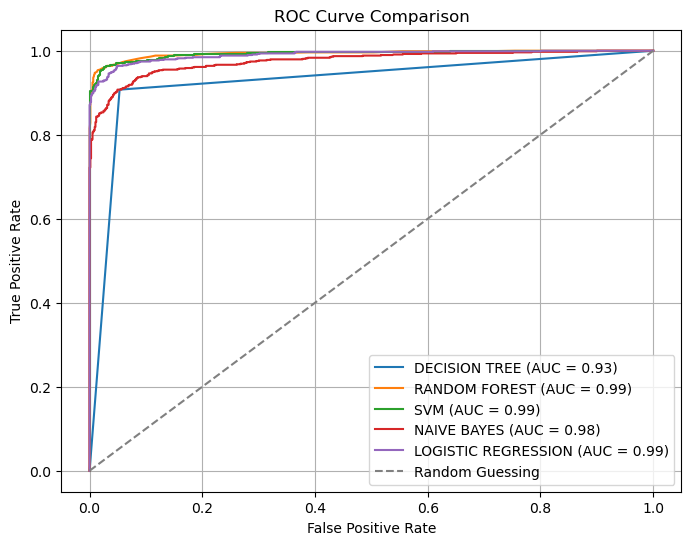

In [14]:
# R O C  CURVE

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Get prediction probabilities (if model supports it)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
    else:
        # For SVM or models that don’t support predict_proba, use decision_function
        y_proba = model.decision_function(X_test)
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot baseline (random guessing)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guessing")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
